## EDA FILE

-------

### Imports

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from ast import literal_eval

----------

### Read in files

In [2]:
# tmdb file

tmdb = pd.read_csv('CLEANDATA/tmdb_full.csv', index_col=False)

In [3]:
tmdb.sample(n=10, random_state=1).T

,2457,763,2993,3909,724,2303,645,4670,4487,1125
ID,302038,65253,769686,708205,235201,373035,1100148,872247,978228,15055
Title,An Erotic Tale of Ms. Dracula,The Bracelet of Bordeaux,The fable of silence,Hide and Seek,I-Be Area,Between the Lines,Dreammaker,Until We Meet Again,Long Low Line (Fordland),Suspension
Release Date,2014-04-03,2007-06-06,2017-12-10,2019-05-17,2007-09-08,2015-08-18,2007-04-30,2022-02-15,2022-04-06,2008-01-01
Popularity,1.739,0.78,1.742,0.508,1.483,0.608,0.002,1.876,0.024,2.421
Vote Average,7.0,4.1,0.0,6.0,5.8,0.0,0.0,5.4,0.0,5.0
Vote Count,3,9,0,1,5,0,0,8,0,21
Budget,0,70000,0,1000,0,0,0,0,0,0
Revenue,0,0,0,0,0,0,0,0,0,0
Runtime,76,99,10,15,108,0,14,91,18,95
Genres,"Fantasy, Horror","Fantasy, Science Fiction, Family","Drama, Fantasy, Horror","Adventure, Comedy, Fantasy","Comedy, Science Fiction, Fantasy","Drama, Fantasy","Animation, Fantasy","Romance, Drama, Fantasy","Fantasy, Documentary, Animation, Mystery, Western","Action, Drama, Fantasy, Science Fiction, Thriller"


-----------

### Removing unnecessary data

In [4]:
# drop columns:- ID, Runtime, Overview, Tagline, Status

tmdb_d = tmdb.drop(columns=['ID', 'Runtime', 'Overview', 'Tagline', 'Status'])
tmdb_d.sample(n=10, random_state=1)

,Title,Release Date,Popularity,Vote Average,Vote Count,Budget,Revenue,Genres,Original Language,Production Companies,Production Countries,Director
2457,An Erotic Tale of Ms. Dracula,2014-04-03,1.739,7.0,3,0,0,"Fantasy, Horror",en,"Elicit World Entertainment, Old Mill Entertain...",United States of America,Jake Kane
763,The Bracelet of Bordeaux,2007-06-06,0.780,4.1,9,70000,0,"Fantasy, Science Fiction, Family",en,NaN,NaN,Casey Kelly
2993,The fable of silence,2017-12-10,1.742,0.0,0,0,0,"Drama, Fantasy, Horror",en,Asociacion Mexicana de Cineastas Independiente...,Mexico,El Huitzo
3909,Hide and Seek,2019-05-17,0.508,6.0,1,1000,0,"Adventure, Comedy, Fantasy",en,NaN,NaN,Salvatore Frederick
724,I-Be Area,2007-09-08,1.483,5.8,5,0,0,"Comedy, Science Fiction, Fantasy",en,Fitch Trecartin Studios,United States of America,Ryan Trecartin
2303,Between the Lines,2015-08-18,0.608,0.0,0,0,0,"Drama, Fantasy",en,Kode Media,United States of America,Rollo Hollins
645,Dreammaker,2007-04-30,0.002,0.0,0,0,0,"Animation, Fantasy",en,NaN,Germany,NaN
4670,Until We Meet Again,2022-02-15,1.876,5.4,8,0,0,"Romance, Drama, Fantasy",en,"RoadReady Productions, 1091 Pictures",United States of America,Pece Dingo
4487,Long Low Line (Fordland),2022-04-06,0.024,0.0,0,0,0,"Fantasy, Documentary, Animation, Mystery, Western",en,NaN,NaN,Danielle Dean
1125,Suspension,2008-01-01,2.421,5.0,21,0,0,"Action, Drama, Fantasy, Science Fiction, Thriller",en,EasyAction,United States of America,Alec Joler


In [5]:
tmdb_d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5452 entries, 0 to 5451
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Title                 5452 non-null   object 
 1   Release Date          5452 non-null   object 
 2   Popularity            5452 non-null   float64
 3   Vote Average          5452 non-null   float64
 4   Vote Count            5452 non-null   int64  
 5   Budget                5452 non-null   int64  
 6   Revenue               5452 non-null   int64  
 7   Genres                5451 non-null   object 
 8   Original Language     5452 non-null   object 
 9   Production Companies  3337 non-null   object 
 10  Production Countries  3875 non-null   object 
 11  Director              5269 non-null   object 
dtypes: float64(2), int64(3), object(7)
memory usage: 511.3+ KB


In [6]:
# drop na Director

tmdb_d = tmdb_d.dropna(subset=['Director'])
tmdb_d.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5269 entries, 0 to 5451
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Title                 5269 non-null   object 
 1   Release Date          5269 non-null   object 
 2   Popularity            5269 non-null   float64
 3   Vote Average          5269 non-null   float64
 4   Vote Count            5269 non-null   int64  
 5   Budget                5269 non-null   int64  
 6   Revenue               5269 non-null   int64  
 7   Genres                5268 non-null   object 
 8   Original Language     5269 non-null   object 
 9   Production Companies  3280 non-null   object 
 10  Production Countries  3789 non-null   object 
 11  Director              5269 non-null   object 
dtypes: float64(2), int64(3), object(7)
memory usage: 535.1+ KB


In [7]:
tmdb_d.duplicated().sum()

13

In [8]:
tmdb_d.drop_duplicates(inplace=True)

--------

### Creating RIO

In [9]:
# Revenue and Budget > 0
tmdb_d = tmdb_d[(tmdb_d['Budget']) > 0 & (tmdb_d['Revenue'] > 0)]

In [10]:
# create RIO
tmdb_d['RIO'] = (tmdb_d['Revenue'].values + tmdb_d['Budget'].values) / tmdb_d['Budget'].values

-----------

### Genre Analysis: Finding the most popular genres

In [11]:
tmdb_G = tmdb_d.dropna(subset='Genres')

In [12]:
tmdb_G['Genres'] = tmdb_G['Genres'].str.split(',')

In [13]:
tmdb_G = tmdb_G.explode('Genres')

In [14]:
tmdb_G['Genres'] = tmdb_G['Genres'].str.strip()

In [15]:
tmdb_G.head()

,Title,Release Date,Popularity,Vote Average,Vote Count,Budget,Revenue,Genres,Original Language,Production Companies,Production Countries,Director,RIO
0,The Lord of the Rings: The Fellowship of the Ring,2001-12-18,164.089,8.415,24921,93000000,871368364,Adventure,en,"New Line Cinema, WingNut Films, The Saul Zaent...","New Zealand, United States of America",Peter Jackson,10.369552
0,The Lord of the Rings: The Fellowship of the Ring,2001-12-18,164.089,8.415,24921,93000000,871368364,Fantasy,en,"New Line Cinema, WingNut Films, The Saul Zaent...","New Zealand, United States of America",Peter Jackson,10.369552
0,The Lord of the Rings: The Fellowship of the Ring,2001-12-18,164.089,8.415,24921,93000000,871368364,Action,en,"New Line Cinema, WingNut Films, The Saul Zaent...","New Zealand, United States of America",Peter Jackson,10.369552
1,Shrek,2001-05-18,136.967,7.745,16948,60000000,488628188,Animation,en,"Pacific Data Images, DreamWorks Animation",United States of America,Andrew Adamson,9.143803
1,Shrek,2001-05-18,136.967,7.745,16948,60000000,488628188,Comedy,en,"Pacific Data Images, DreamWorks Animation",United States of America,Andrew Adamson,9.143803


In [16]:
GenrePop = tmdb_G.groupby('Genres').mean(numeric_only=True).sort_values(by='Popularity', ascending=False)

In [17]:
GenrePop[:5]

,Popularity,Vote Average,Vote Count,Budget,Revenue,RIO
Genres,,,,,,
Family,32.430605,6.093149,2714.459677,6.505145e+07,1.763277e+08,2.874137
Animation,29.935179,5.582445,2309.335260,5.015791e+07,1.468076e+08,2.635667
Action,28.552072,5.327356,3761.512712,6.595268e+07,1.808556e+08,2.593098
Adventure,27.856626,5.389466,3505.312849,6.658451e+07,1.981635e+08,2.784590
Romance,19.081344,4.999710,2026.717557,3.006789e+07,1.028735e+08,2.595945


<Axes: xlabel='Popularity', ylabel='Genres'>

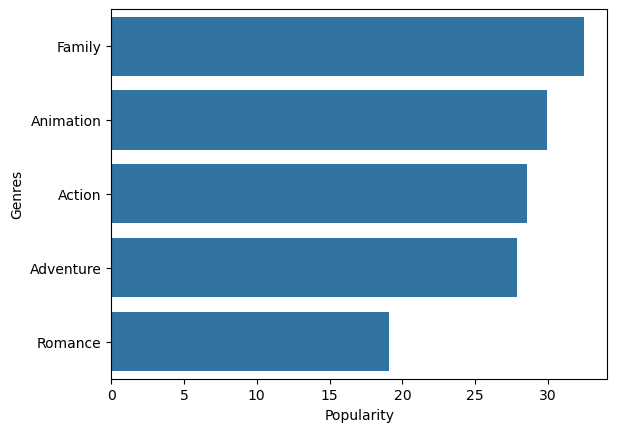

In [18]:
sns.barplot(y='Genres', x='Popularity', data=GenrePop[:5])

----------

### Directors within popular genres

#### Family

In [19]:
# family Genre

tmdb_GF = tmdb_G[tmdb_G['Genres'] == 'Family']

In [20]:
GF = tmdb_GF.groupby('Director').mean(numeric_only=True).sort_values(by=['Vote Count', 'Popularity'], ascending=False)

In [21]:
GF[:5]

,Popularity,Vote Average,Vote Count,Budget,Revenue,RIO
Director,,,,,,
Brad Bird,96.139,7.8240,16869.0,150000000.0,6.237260e+08,5.158173
Bill Condon,69.097,6.9710,15343.0,160000000.0,1.266116e+09,8.913225
Mark Andrews,59.997,7.0200,13243.0,185000000.0,5.390000e+08,3.913514
Robert Stromberg,54.755,7.0940,12987.0,180000000.0,7.585398e+08,5.214110
Jennifer Lee,78.947,7.2515,12985.5,150000000.0,1.363951e+09,10.093008


<Axes: xlabel='Vote Count', ylabel='Director'>

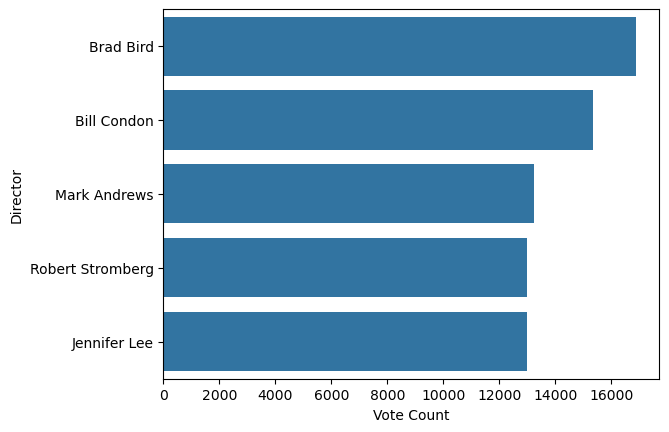

In [22]:
sns.barplot(y='Director', x='Vote Count', data=GF[:5])

#### Adventure


In [23]:
# Adventure Genre

tmdb_GA = tmdb_G[tmdb_G['Genres'] == 'Adventure']

In [24]:
GA = tmdb_GA.groupby('Director').mean(numeric_only=True).sort_values(by=['Vote Count', 'Popularity'], ascending=False)

In [25]:
GA[:5]

,Popularity,Vote Average,Vote Count,Budget,Revenue,RIO
Director,,,,,,
James Cameron,80.5970,7.582000,31311.0,2.370000e+08,2.923706e+09,13.336312
Scott Derrickson,61.8920,7.424000,21946.0,1.800000e+08,6.763432e+08,4.757462
Gary Ross,31.7580,7.210000,21770.0,7.500000e+07,6.943947e+08,10.258596
David Ayer,47.5090,5.919000,20949.0,1.750000e+08,7.492001e+08,5.281143
Peter Jackson,121.4895,7.925333,19316.5,1.693333e+08,9.753447e+08,8.456646


<Axes: xlabel='Vote Count', ylabel='Director'>

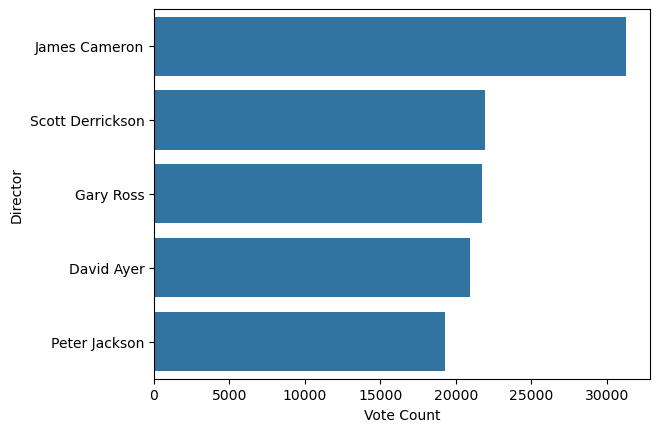

In [26]:
sns.barplot(y='Director', x='Vote Count', data=GA[:5])

#### Action


In [27]:
tmdb_GAC = tmdb_G[tmdb_G['Genres'] == 'Action']

In [28]:
GAC = tmdb_GAC.groupby('Director').mean(numeric_only=True).sort_values(by=['Vote Count', 'Popularity'], ascending=False)

In [29]:
GAC[:5]

,Popularity,Vote Average,Vote Count,Budget,Revenue,RIO
Director,,,,,,
James Cameron,80.597000,7.582000,31311.000000,2.370000e+08,2.923706e+09,13.336312
Scott Derrickson,61.892000,7.424000,21946.000000,1.800000e+08,6.763432e+08,4.757462
Peter Jackson,121.489500,7.925333,19316.500000,1.693333e+08,9.753447e+08,8.456646
Alan Taylor,62.363000,6.525000,17127.000000,1.700000e+08,6.447831e+08,4.792842
Gore Verbinski,118.987333,7.476667,16780.333333,2.133333e+08,8.939037e+08,5.403495


<Axes: xlabel='Vote Count', ylabel='Director'>

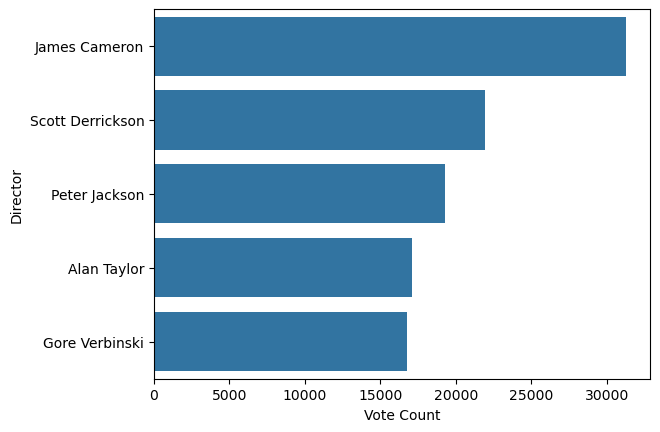

In [30]:
sns.barplot(y='Director', x='Vote Count', data=GAC[:5])

#### Animation


In [31]:
tmdb_GAN = tmdb_G[tmdb_G['Genres'] == 'Animation']

In [32]:
GAN = tmdb_GAN.groupby('Director').mean(numeric_only=True).sort_values(by=['Vote Count', 'Popularity'], ascending=False)

In [33]:
GAN[:5]

,Popularity,Vote Average,Vote Count,Budget,Revenue,RIO
Director,,,,,,
Andrew Adamson,136.9670,7.7450,16948.0,60000000.0,4.886282e+08,9.143803
Brad Bird,96.1390,7.8240,16869.0,150000000.0,6.237260e+08,5.158173
Mark Andrews,59.9970,7.0200,13243.0,185000000.0,5.390000e+08,3.913514
Jennifer Lee,78.9470,7.2515,12985.5,150000000.0,1.363951e+09,10.093008
Dean DeBlois,72.0935,7.7520,11158.5,155000000.0,5.582085e+08,4.642868


<Axes: xlabel='Vote Count', ylabel='Director'>

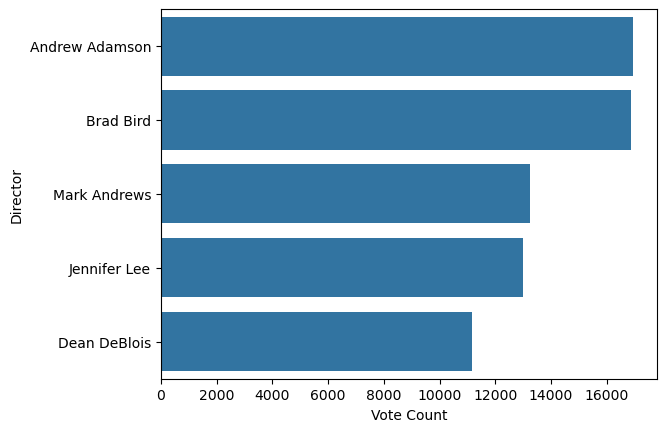

In [34]:
sns.barplot(y='Director', x='Vote Count', data=GAN[:5])

#### Romance

In [35]:
tmdb_RAC = tmdb_G[tmdb_G['Genres'] == 'Romance']

In [36]:
RAC = tmdb_RAC.groupby('Director').mean(numeric_only=True).sort_values(by=['Vote Count', 'Popularity'], ascending=False)

In [37]:
RAC[:5]

,Popularity,Vote Average,Vote Count,Budget,Revenue,RIO
Director,,,,,,
Catherine Hardwicke,88.662,6.290,13367.0,37000000.0,393616788.0,11.638292
Robert Stromberg,54.755,7.094,12987.0,180000000.0,758539785.0,5.214110
David Fincher,45.990,7.600,12628.0,150000000.0,335800000.0,3.238667
Conrad Vernon,112.566,7.280,12162.0,150000000.0,935454538.0,7.236364
Guillermo del Toro,84.468,7.245,12008.0,19500000.0,195300000.0,11.015385


<Axes: xlabel='Vote Count', ylabel='Director'>

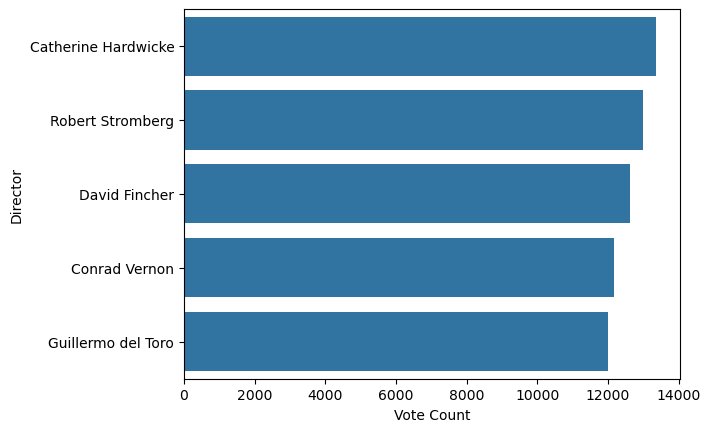

In [38]:
sns.barplot(y='Director', x='Vote Count', data=RAC[:5])

----------

### Popular Studios Within Genre

In [39]:
tmdb_G['Production Companies'] = tmdb_G['Production Companies'].str.split(',')

In [40]:
tmdb_P = tmdb_G.explode('Production Companies')

In [41]:
tmdb_P

,Title,Release Date,Popularity,Vote Average,Vote Count,Budget,Revenue,Genres,Original Language,Production Companies,Production Countries,Director,RIO
0,The Lord of the Rings: The Fellowship of the Ring,2001-12-18,164.089,8.415,24921,93000000,871368364,Adventure,en,New Line Cinema,"New Zealand, United States of America",Peter Jackson,10.369552
0,The Lord of the Rings: The Fellowship of the Ring,2001-12-18,164.089,8.415,24921,93000000,871368364,Adventure,en,WingNut Films,"New Zealand, United States of America",Peter Jackson,10.369552
0,The Lord of the Rings: The Fellowship of the Ring,2001-12-18,164.089,8.415,24921,93000000,871368364,Adventure,en,The Saul Zaentz Company,"New Zealand, United States of America",Peter Jackson,10.369552
0,The Lord of the Rings: The Fellowship of the Ring,2001-12-18,164.089,8.415,24921,93000000,871368364,Fantasy,en,New Line Cinema,"New Zealand, United States of America",Peter Jackson,10.369552
0,The Lord of the Rings: The Fellowship of the Ring,2001-12-18,164.089,8.415,24921,93000000,871368364,Fantasy,en,WingNut Films,"New Zealand, United States of America",Peter Jackson,10.369552
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5437,Christmas Slasher,2023-03-29,0.387,10.000,1,11000,0,Drama,en,Anchor Bay Films,United States of America,Destiny Soria,1.000000
5437,Christmas Slasher,2023-03-29,0.387,10.000,1,11000,0,Crime,en,Anchor Bay Films,United States of America,Destiny Soria,1.000000
5437,Christmas Slasher,2023-03-29,0.387,10.000,1,11000,0,Thriller,en,Anchor Bay Films,United States of America,Destiny Soria,1.000000
5437,Christmas Slasher,2023-03-29,0.387,10.000,1,11000,0,Fantasy,en,Anchor Bay Films,United States of America,Destiny Soria,1.000000


<Axes: xlabel='RIO', ylabel='Popularity'>

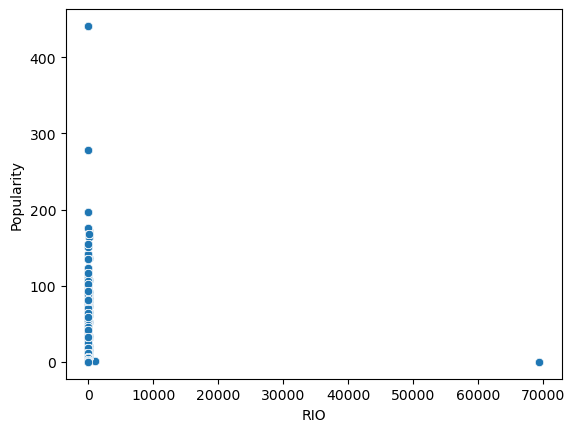

In [42]:
sns.scatterplot(y='Popularity', x='RIO', data=tmdb_P)

In [43]:
#### Action
tmdb_PAC = tmdb_P[tmdb_P['Genres'] == 'Action']
PAC = tmdb_PAC.groupby('Production Companies').mean(numeric_only=True).sort_values(by=['Popularity'], ascending=False)
PAC[:5]

,Popularity,Vote Average,Vote Count,Budget,Revenue,RIO
Production Companies,,,,,,
The Saul Zaentz Company,144.66675,8.154500,21166.75,1.290000e+08,9.681411e+08,10.205466
WingNut Films,121.48950,7.925333,19316.50,1.693333e+08,9.753447e+08,8.456646
Domain Entertainment,116.88000,6.682000,2713.00,2.050000e+08,4.343812e+08,3.118933
Atomic Monster,116.88000,6.682000,2713.00,2.050000e+08,4.343812e+08,3.118933
Second Mate Productions,107.91850,7.312500,14964.50,2.500000e+08,1.013350e+09,5.265917


<Axes: xlabel='Popularity', ylabel='Production Companies'>

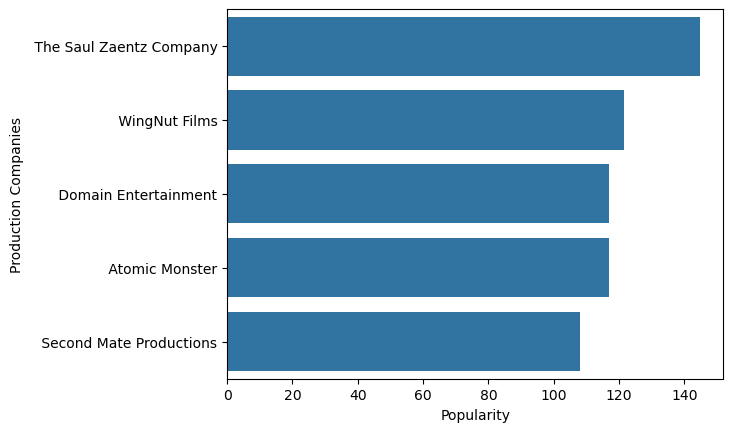

In [44]:
sns.barplot(y='Production Companies', x='Popularity', data=PAC[:5])

In [45]:
#### Adventure
tmdb_PAD = tmdb_P[tmdb_P['Genres'] == 'Adventure']
PAD = tmdb_PAD.groupby('Production Companies').mean(numeric_only=True).sort_values(by=['Popularity'], ascending=False)
PAD[:5]

,Popularity,Vote Average,Vote Count,Budget,Revenue,RIO
Production Companies,,,,,,
Nintendo,167.30500,7.6550,8948.00,100000000.0,1.362000e+09,14.620000
Illumination,167.30500,7.6550,8948.00,100000000.0,1.362000e+09,14.620000
C.S. Lewis Company,151.37400,7.1360,10505.00,180000000.0,7.450131e+08,5.138962
The Saul Zaentz Company,144.66675,8.1545,21166.75,129000000.0,9.681411e+08,10.205466
Pacific Data Images,136.96700,7.7450,16948.00,60000000.0,4.886282e+08,9.143803


<Axes: xlabel='Popularity', ylabel='Production Companies'>

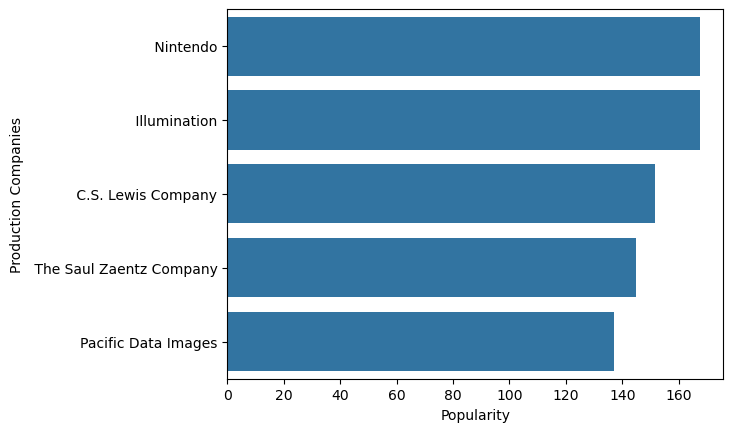

In [46]:
sns.barplot(y='Production Companies', x='Popularity', data=PAD[:5])

In [47]:
#### Animation

tmdb_PAN = tmdb_P[tmdb_P['Genres'] == 'Animation']
PAN = tmdb_PAN.groupby('Production Companies').mean(numeric_only=True).sort_values(by=['Popularity'], ascending=False)
PAN[:5]

,Popularity,Vote Average,Vote Count,Budget,Revenue,RIO
Production Companies,,,,,,
Pandemonium,196.962,7.885,7891.0,60000000.0,172750668.0,3.879178
Tim Burton Productions,175.525,7.566,8987.0,40000000.0,118133252.0,3.953331
Will Vinton Studios,175.525,7.566,8987.0,40000000.0,118133252.0,3.953331
Patalex Productions,175.525,7.566,8987.0,40000000.0,118133252.0,3.953331
Laika,175.525,7.566,8987.0,40000000.0,118133252.0,3.953331


<Axes: xlabel='Popularity', ylabel='Production Companies'>

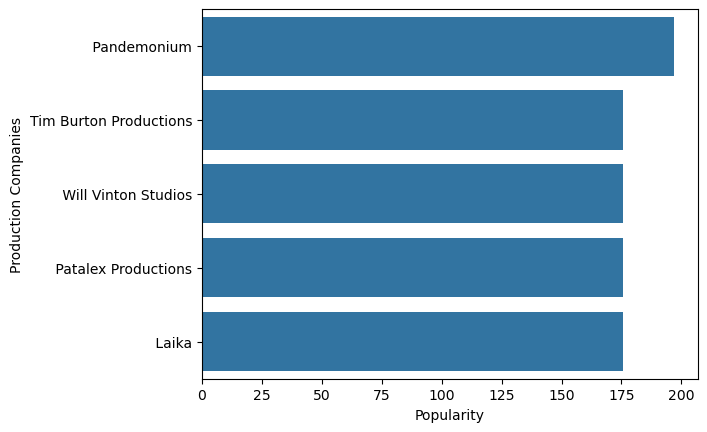

In [48]:
sns.barplot(y='Production Companies', x='Popularity', data=PAN[:5])

In [49]:
#### Romance

tmdb_PR = tmdb_P[tmdb_P['Genres'] == 'Romance']
PR = tmdb_PR.groupby('Production Companies').mean(numeric_only=True).sort_values(by=['Popularity'], ascending=False)
PR[:5]

,Popularity,Vote Average,Vote Count,Budget,Revenue,RIO
Production Companies,,,,,,
Laika,175.525,7.566,8987.0,40000000.0,118133252.0,3.953331
Tim Burton Productions,175.525,7.566,8987.0,40000000.0,118133252.0,3.953331
Will Vinton Studios,175.525,7.566,8987.0,40000000.0,118133252.0,3.953331
Patalex Productions,175.525,7.566,8987.0,40000000.0,118133252.0,3.953331
Pixar,123.620,7.643,4356.0,200000000.0,496000000.0,3.480000


<Axes: xlabel='Popularity', ylabel='Production Companies'>

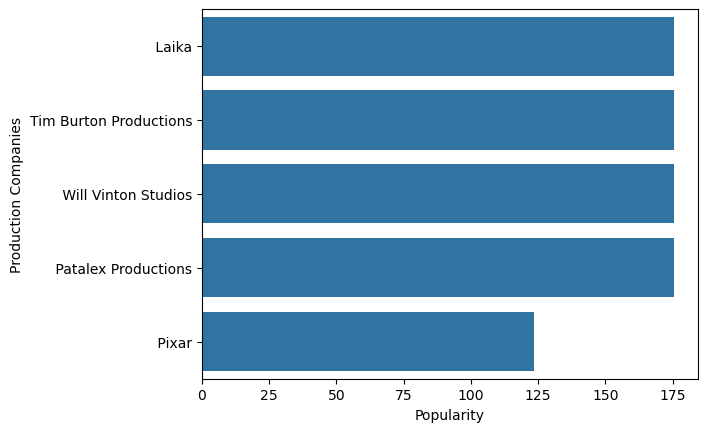

In [50]:
sns.barplot(y='Production Companies', x='Popularity', data=PR[:5])

In [51]:
#### Family

tmdb_PF = tmdb_P[tmdb_P['Genres'] == 'Family']
PF = tmdb_PF.groupby('Production Companies').mean(numeric_only=True).sort_values(by=['Popularity'], ascending=False)
PF[:5]

,Popularity,Vote Average,Vote Count,Budget,Revenue,RIO
Production Companies,,,,,,
Sunday Night Productions,441.113,7.283,904.0,110000000.0,1.862409e+08,2.693099
Maximum Effort,441.113,7.283,904.0,110000000.0,1.862409e+08,2.693099
Pandemonium,196.962,7.885,7891.0,60000000.0,1.727507e+08,3.879178
Nintendo,167.305,7.655,8948.0,100000000.0,1.362000e+09,14.620000
Illumination,167.305,7.655,8948.0,100000000.0,1.362000e+09,14.620000


<Axes: xlabel='Popularity', ylabel='Production Companies'>

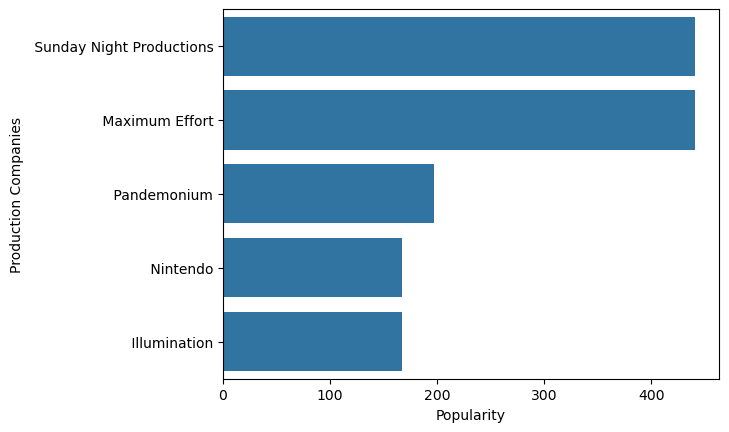

In [52]:
sns.barplot(y='Production Companies', x='Popularity', data=PF[:5])

--------

In [53]:
### ROI on companies per genre

# Action

tmdb_PAC = tmdb_P[tmdb_P['Genres'] == 'Action']
PAC = tmdb_PAC.groupby('Production Companies').mean(numeric_only=True).sort_values(by=['RIO'], ascending=False)
PAC[:5]

,Popularity,Vote Average,Vote Count,Budget,Revenue,RIO
Production Companies,,,,,,
Lightstorm Entertainment,80.59700,7.582000,31311.00,2.370000e+08,2.923706e+09,13.336312
The Saul Zaentz Company,144.66675,8.154500,21166.75,1.290000e+08,9.681411e+08,10.205466
Dune Entertainment,74.28750,6.375000,17085.00,1.385000e+08,1.526998e+09,8.796792
WingNut Films,121.48950,7.925333,19316.50,1.693333e+08,9.753447e+08,8.456646
HILT Productions,9.20500,6.000000,398.00,2.000000e+05,1.395610e+06,7.978050


<Axes: xlabel='RIO', ylabel='Production Companies'>

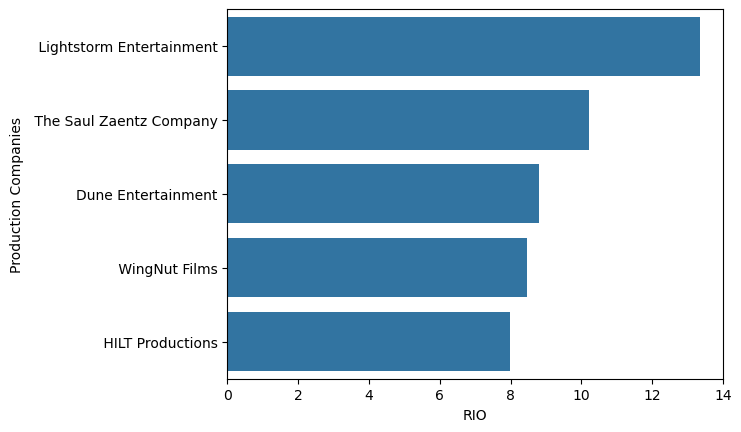

In [54]:
sns.barplot(y='Production Companies', x='RIO', data=PAC[:5])

In [55]:
#### Adventure

tmdb_PAD = tmdb_P[tmdb_P['Genres'] == 'Adventure']
PAD = tmdb_PAD.groupby('Production Companies').mean(numeric_only=True).sort_values(by=['RIO'], ascending=False)
PAD[:5]

,Popularity,Vote Average,Vote Count,Budget,Revenue,RIO
Production Companies,,,,,,
Nintendo,167.305,7.6550,8948.0,100000000.0,1.362000e+09,14.620000
Illumination,167.305,7.6550,8948.0,100000000.0,1.362000e+09,14.620000
Lightstorm Entertainment,80.597,7.5820,31311.0,237000000.0,2.923706e+09,13.336312
Imprint Entertainment,67.825,6.1005,8858.0,59000000.0,7.041594e+08,13.234240
Matt Tolmach Productions,32.600,6.8260,13477.0,90000000.0,9.953391e+08,12.059324


<Axes: xlabel='RIO', ylabel='Production Companies'>

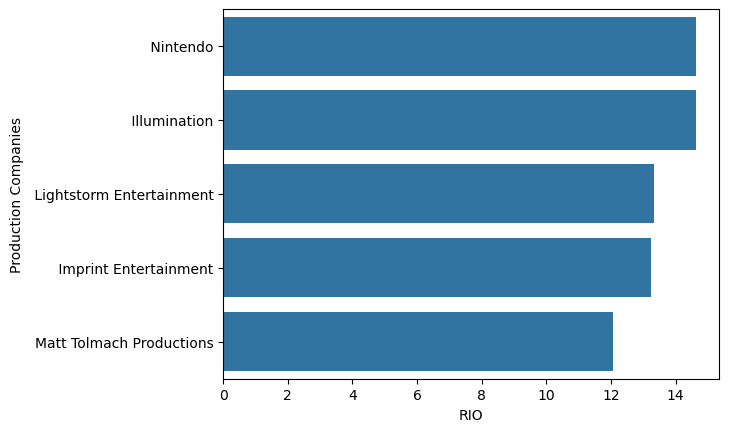

In [56]:
sns.barplot(y='Production Companies', x='RIO', data=PAD[:5])

In [57]:
#### Animation

tmdb_PAN = tmdb_P[tmdb_P['Genres'] == 'Animation']
PAN = tmdb_PAN.groupby('Production Companies').mean(numeric_only=True).sort_values(by=['RIO'], ascending=False)
PAN[:5]

,Popularity,Vote Average,Vote Count,Budget,Revenue,RIO
Production Companies,,,,,,
Illumination,167.305,7.655,8948.0,100000000.0,1.362000e+09,14.620000
Nintendo,167.305,7.655,8948.0,100000000.0,1.362000e+09,14.620000
DHX Media,20.862,7.237,372.0,6000000.0,6.129464e+07,11.215774
Allspark Pictures,20.862,7.237,372.0,6000000.0,6.129464e+07,11.215774
Lionsgate,20.862,7.237,372.0,6000000.0,6.129464e+07,11.215774


<Axes: xlabel='RIO', ylabel='Production Companies'>

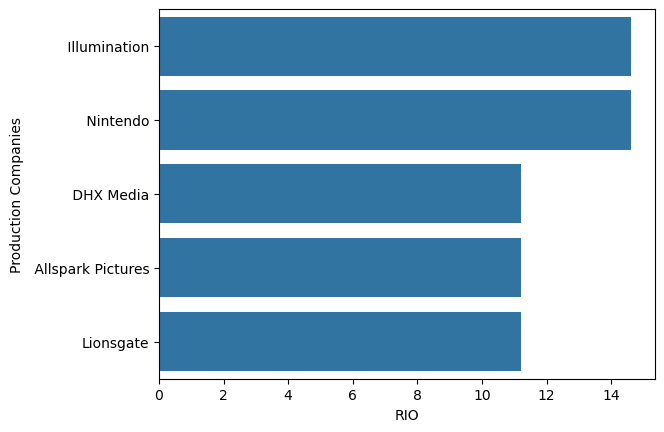

In [58]:
sns.barplot(y='Production Companies', x='RIO', data=PAN[:5])

In [59]:
#### Romance

tmdb_PR = tmdb_P[tmdb_P['Genres'] == 'Romance']
PR = tmdb_PR.groupby('Production Companies').mean(numeric_only=True).sort_values(by=['RIO'], ascending=False)
PR[:5]

,Popularity,Vote Average,Vote Count,Budget,Revenue,RIO
Production Companies,,,,,,
Maverick Films,74.770667,6.163667,10361.0,5.166667e+07,600645199.0,12.702257
Imprint Entertainment,74.770667,6.163667,10361.0,5.166667e+07,600645199.0,12.702257
Goldcrest,88.662000,6.290000,13367.0,3.700000e+07,393616788.0,11.638292
Aura Films,88.662000,6.290000,13367.0,3.700000e+07,393616788.0,11.638292
Bull Productions,84.468000,7.245000,12008.0,1.950000e+07,195300000.0,11.015385


<Axes: xlabel='RIO', ylabel='Production Companies'>

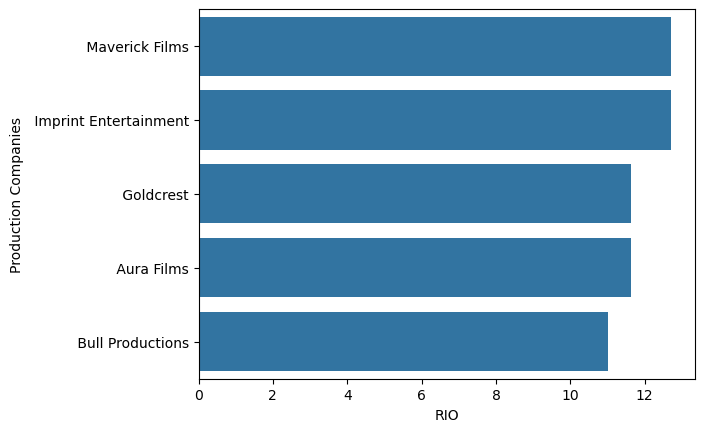

In [60]:
sns.barplot(y='Production Companies', x='RIO', data=PR[:5])

In [61]:
#### Family

tmdb_PF = tmdb_P[tmdb_P['Genres'] == 'Family']
PF = tmdb_PF.groupby('Production Companies').mean(numeric_only=True).sort_values(by=['RIO'], ascending=False)
PF[:5]

,Popularity,Vote Average,Vote Count,Budget,Revenue,RIO
Production Companies,,,,,,
Illumination,167.305,7.655,8948.0,100000000.0,1.362000e+09,14.620000
Nintendo,167.305,7.655,8948.0,100000000.0,1.362000e+09,14.620000
Allspark Pictures,20.862,7.237,372.0,6000000.0,6.129464e+07,11.215774
Lionsgate,20.862,7.237,372.0,6000000.0,6.129464e+07,11.215774
DHX Media,20.862,7.237,372.0,6000000.0,6.129464e+07,11.215774


<Axes: xlabel='RIO', ylabel='Production Companies'>

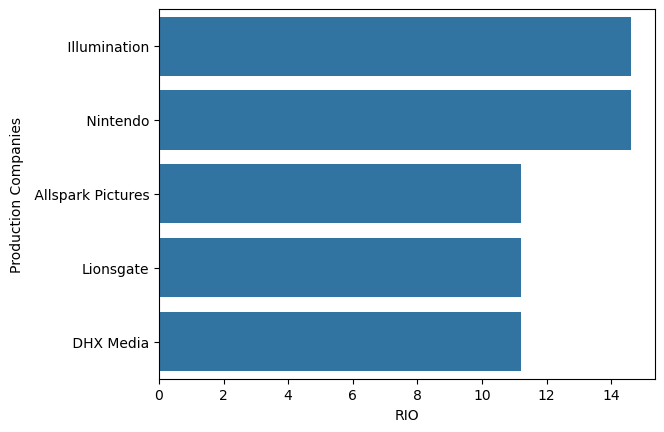

In [62]:
sns.barplot(y='Production Companies', x='RIO', data=PF[:5])

--------

In [63]:
tmdb_P

,Title,Release Date,Popularity,Vote Average,Vote Count,Budget,Revenue,Genres,Original Language,Production Companies,Production Countries,Director,RIO
0,The Lord of the Rings: The Fellowship of the Ring,2001-12-18,164.089,8.415,24921,93000000,871368364,Adventure,en,New Line Cinema,"New Zealand, United States of America",Peter Jackson,10.369552
0,The Lord of the Rings: The Fellowship of the Ring,2001-12-18,164.089,8.415,24921,93000000,871368364,Adventure,en,WingNut Films,"New Zealand, United States of America",Peter Jackson,10.369552
0,The Lord of the Rings: The Fellowship of the Ring,2001-12-18,164.089,8.415,24921,93000000,871368364,Adventure,en,The Saul Zaentz Company,"New Zealand, United States of America",Peter Jackson,10.369552
0,The Lord of the Rings: The Fellowship of the Ring,2001-12-18,164.089,8.415,24921,93000000,871368364,Fantasy,en,New Line Cinema,"New Zealand, United States of America",Peter Jackson,10.369552
0,The Lord of the Rings: The Fellowship of the Ring,2001-12-18,164.089,8.415,24921,93000000,871368364,Fantasy,en,WingNut Films,"New Zealand, United States of America",Peter Jackson,10.369552
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5437,Christmas Slasher,2023-03-29,0.387,10.000,1,11000,0,Drama,en,Anchor Bay Films,United States of America,Destiny Soria,1.000000
5437,Christmas Slasher,2023-03-29,0.387,10.000,1,11000,0,Crime,en,Anchor Bay Films,United States of America,Destiny Soria,1.000000
5437,Christmas Slasher,2023-03-29,0.387,10.000,1,11000,0,Thriller,en,Anchor Bay Films,United States of America,Destiny Soria,1.000000
5437,Christmas Slasher,2023-03-29,0.387,10.000,1,11000,0,Fantasy,en,Anchor Bay Films,United States of America,Destiny Soria,1.000000


In [64]:
##### Create File

tmdb_P.to_csv('CLEANDATA/TableauTMDB.csv', index=False)